In [12]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict 
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [47]:
#Dictionary for genres label encoding:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [48]:
#cargo csvs:
data=pd.read_csv("./Features/features3.csv")#training data
t1data=pd.read_csv("./Features/features_test_1.csv")#test songs 1 row
t2data=pd.read_csv("./Features/features_test_2.csv")#test songs 2 rows


In [49]:
X=data.drop('genre',axis=1)
Xt1=t1data.drop('genre',axis=1)
Xt2=t2data.drop('genre',axis=1)

In [50]:
y=data.genre
yt1=t1data.genre
yt2=t2data.genre


In [51]:
scaled_features = StandardScaler().fit_transform(X.values)
sc1=StandardScaler().fit_transform(Xt1.values)
sc2=StandardScaler().fit_transform(Xt2.values)

X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
Xt1=pd.DataFrame(sc1, index=Xt1.index, columns=Xt1.columns)
Xt2=pd.DataFrame(sc2, index=Xt2.index, columns=Xt2.columns)


In [52]:
X.shape

(2970, 39)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from keras import models
from keras import layers

model1 = models.Sequential()

model1.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(rate=0.25, noise_shape=None, seed=None))
model1.add(layers.Dense(10, activation='softmax'))

In [55]:
#Try with 'rmsprop' optimizer
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
history = model1.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=128,validation_split=0.1)

Train on 2138 samples, validate on 238 samples
Epoch 1/50
2138/2138 [==============================] - 4s 2ms/step - loss: 2.0589 - acc: 0.2615 - val_loss: 1.7733 - val_acc: 0.3571
Epoch 2/50
2138/2138 [==============================] - 0s 71us/step - loss: 1.6089 - acc: 0.4210 - val_loss: 1.4259 - val_acc: 0.4790
Epoch 3/50
2138/2138 [==============================] - 0s 77us/step - loss: 1.4006 - acc: 0.4986 - val_loss: 1.2207 - val_acc: 0.5420
Epoch 4/50
2138/2138 [==============================] - 0s 80us/step - loss: 1.2378 - acc: 0.5650 - val_loss: 1.0758 - val_acc: 0.6429
Epoch 5/50
2138/2138 [==============================] - 0s 68us/step - loss: 1.1199 - acc: 0.6151 - val_loss: 0.9733 - val_acc: 0.6429
Epoch 6/50
2138/2138 [==============================] - 0s 64us/step - loss: 1.0499 - acc: 0.6155 - val_loss: 0.8940 - val_acc: 0.6933
Epoch 7/50
2138/2138 [==============================] - 0s 73us/step - loss: 0.9922 - acc: 0.6618 - val_loss: 0.8413 - val_acc: 0.7017
Epoch 8/5

In [57]:
test_loss, test_acc = model1.evaluate(X_test,y_test)

594/594 [==============================] - 0s 63us/step


In [58]:
print(test_loss, test_acc)

0.5551083958911575 0.8400673394652729


In [59]:
test_loss, test_acc = model1.evaluate(X_test[:10],y_test[:10])
print(test_loss, test_acc)

10/10 [==============================] - 0s 413us/step
0.2978782057762146 0.8999999761581421


In [81]:
model1.evaluate(X_test[-10:],y_test[-10:])

10/10 [==============================] - 0s 451us/step


[1.016636610031128, 0.800000011920929]

In [82]:
model1.predict_classes(X_test[-10:])

array([2, 6, 0, 9, 1, 2, 8, 4, 2, 2])

In [83]:
y_test[-10:]

842     2
212     0
12      0
2789    9
422     1
761     2
2611    8
1271    4
602     2
1242    4
Name: genre, dtype: int64

In [60]:
y_pred=model1.predict(X_test)

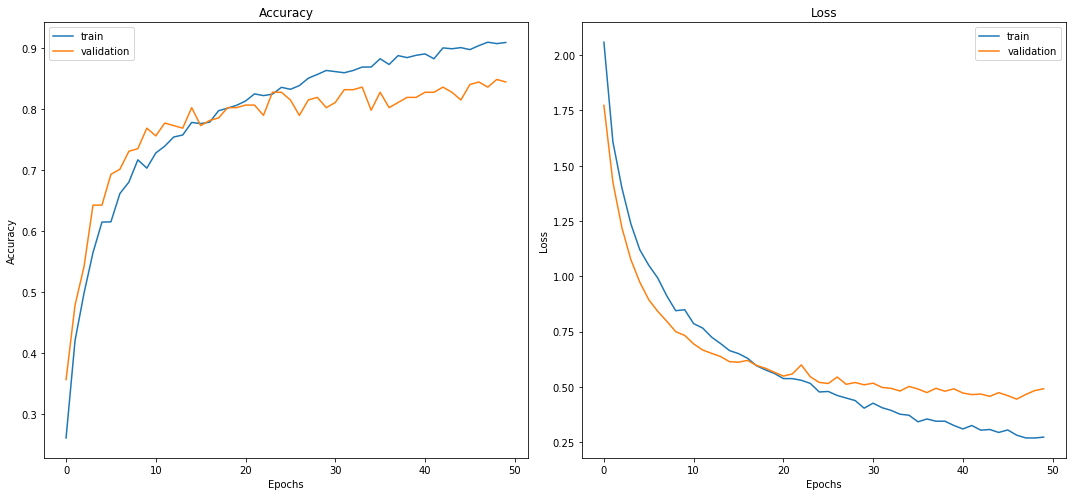

In [61]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


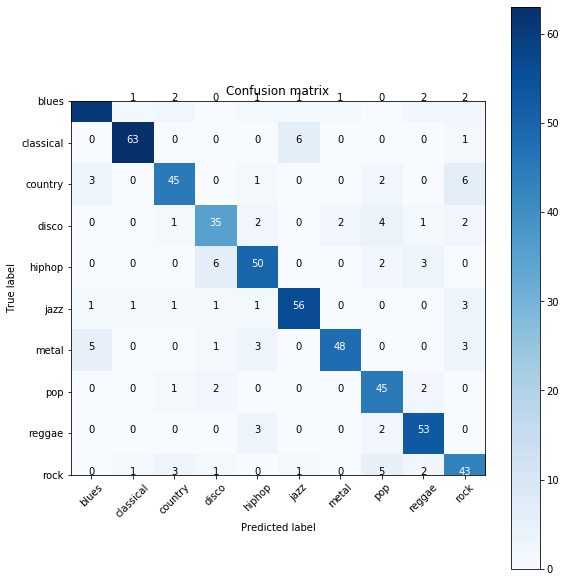

In [63]:
from sklearn.metrics import confusion_matrix
preds = np.argmax(model1.predict(X_test), axis = 1)
cm = confusion_matrix(preds,y_test)
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=False)

In [64]:
#
test_loss, test_acc = model1.evaluate(Xt1,yt1)
print(test_loss, test_acc)

10/10 [==============================] - 0s 22ms/step
0.9808036088943481 0.6000000238418579


In [65]:
test_loss, test_acc = model1.evaluate(Xt2,yt2)
print(test_loss, test_acc)

20/20 [==============================] - 0s 379us/step
1.0979444980621338 0.6499999761581421


In [76]:
model1.predict_classes(Xt2)

array([5, 5, 1, 1, 2, 3, 3, 3, 4, 4, 5, 5, 4, 6, 7, 7, 9, 6, 9, 2])

In [66]:
test_loss, test_acc = model1.evaluate(X_test,y_test)
print(test_loss, test_acc)

594/594 [==============================] - 0s 79us/step
0.5551083958911575 0.8400673394652729


In [72]:
y_pred=model1.predict(Xt1)

In [73]:
model1.predict_classes(Xt1)

array([5, 1, 3, 3, 4, 5, 6, 7, 9, 2])

In [74]:
y_pred[2]


array([1.4195706e-02, 4.2085702e-04, 1.6553096e-01, 7.3273063e-01,
       1.9816535e-03, 3.7941958e-03, 1.5632181e-03, 2.6436338e-02,
       6.9362954e-03, 4.6410136e-02], dtype=float32)